# Data Analysis / *Análisis de Datos*
(Using SQLite, Pandas, Matplotlib, numpy, and os module)
<h1 style="font-size:1.5em;color:#2467C0">The Scope / Objetivo </h1>
(EN) I will use the information gathered from .csv files to see the relationship between the date-time and taxicabs service requiring.

Also this notebook will be the core of the code that will be run to process the rest of the files in the data set. But with some additional commands to use it in an automated fashion. It could be implemented inside a function and things like that, but I'm going to leave it as it's shown.

*(ES) Usaré la información obtenida de archivos .csv para observar la relación entre las fechas-horas y las solicitudes de servicios de taxi.*

*A su vez, usaré el código que desarrollo y comento aquí, como parte central del código que aplicaré al resto de archivos, agregando algunos comandos adicionales con la intención de que sea un proceso automatizado. El código podría ser implementado dentro de una función y cosas por el estilo, pero voy a dejarlo como se muestra a continuación*

### (EN)
### Acquiring Data
* Downloading the files with the information

### Preparing Data
(Pandas, os module)
* Exploring and Cleaning Data
* NaN or null values
* Data quality review
* Cleaning using filters

### Plotting
(Matplotlib, numpy)
### Analysis and Report comments

### Process automation
(os module)

### From Data to Database using SQLite3
(SQLite3)
* Creating a database
* Feeding the database with tables  
---
<br/>

### *(ES)*
### *Adquisición de datos*
* *Descarga de archivos que contienen la información a tratar*

### *Acondicionamiento de Datos*
(Pandas, módulo os)
* *Exploración y limpieza de la información*
* *NaN o valores nulos*
* *Otras revisiones sobre la calidad de los datos*
* *Limpieza usando filtros*

### *Gráficos*
(Matplotlib, numpy)
### *Reporte y comentarios sobre el análisis*

### *Automatización del proceso*
(módulo os)

### *De archivo de Datos a Base de Datos usando SQLite3*
(SQLite3)
* *Crear una Base de Datos*
* *Agregar las tablas a la Base de Datos*
---

### Acquiring Data
I got these files from **NYC Taxi & Limousine Commision**, special thanks to them for sharing this information, the URL to find them is: 

http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml 

In this sample, the source file information are files from 2016, 2017 and 2018 in .csv format.

### *Adquisición de datos*
*Obtuve los archivos de **NYC Taxi & Limousine Commision**, agradecimientos especiales a ellos por compartir esta información, la dirección en la que se puede encontrar dichos archivos es:*

*http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml*

*En este ejemplo, los archivos usados como fuente de información son de 2016, 2017 y 2018 en formato .csv*  

---

### Preparing Data
#### Exploring and Cleaning Data
Once the information is obtained, next step is to have an overall view of it, explore it and remove errors, empty fields (or fill them if the case), lack of information, null values and/or what is not right nor useful.

### *Acondicionar los datos*
#### *Exploración y limpieza de la información* 
*Una vez que la información es obtenida, es importante crear una visión general de la misma, explorarla y eliminar errores, campos vacíos (o completarlos si es el caso), faltas de información, valores nulos y/o lo que no está bien ni es útil.*

In [1]:
# Modules to use along the code // Módulos a utilizar a lo largo del código.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import operator
import sqlite3
%matplotlib inline

(EN) To get an idea of the dataframe dimensions, columns and header records, I'll do the following.

*(ES) Para tener una idea de las dimensiones de los datos (dataframe), columnas y primeros registros, haré lo siguiente.*

In [2]:
currentDf = pd.read_csv('green_tripdata_2016-01.csv', sep = ',') 
print(currentDf.shape)

(1445285, 21)


In [3]:
cols = currentDf.columns
print(cols)

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')


In [4]:
type(currentDf)

pandas.core.frame.DataFrame

In [5]:
currentDf.head(10)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,1,...,8.0,0.5,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0
1,2,2016-01-01 00:19:39,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,1,...,15.5,0.5,0.5,0.00,0.0,NaN,0.3,16.80,2,1.0
2,2,2016-01-01 00:19:33,2016-01-01 00:39:48,N,1,-73.971611,40.676105,-74.013161,40.646072,1,...,16.5,0.5,0.5,4.45,0.0,NaN,0.3,22.25,1,1.0
3,2,2016-01-01 00:22:12,2016-01-01 00:38:32,N,1,-73.989502,40.669579,-74.000648,40.689034,1,...,13.5,0.5,0.5,0.00,0.0,NaN,0.3,14.80,2,1.0
4,2,2016-01-01 00:24:01,2016-01-01 00:39:22,N,1,-73.964729,40.682854,-73.940720,40.663013,1,...,12.0,0.5,0.5,0.00,0.0,NaN,0.3,13.30,2,1.0
5,2,2016-01-01 00:32:59,2016-01-01 00:39:35,N,1,-73.891144,40.746456,-73.867744,40.742111,1,...,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1.0
6,2,2016-01-01 00:34:42,2016-01-01 00:39:21,N,1,-73.896675,40.746197,-73.886192,40.745689,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
7,2,2016-01-01 00:31:23,2016-01-01 00:39:36,N,1,-73.953354,40.803558,-73.949150,40.794121,1,...,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1.0
8,2,2016-01-01 00:24:40,2016-01-01 00:39:52,N,1,-73.994064,40.702816,-73.971573,40.679726,1,...,12.0,0.5,0.5,2.00,0.0,NaN,0.3,15.30,1,1.0
9,2,2016-01-01 00:28:59,2016-01-01 00:39:23,N,1,-73.914131,40.756641,-73.917549,40.739658,1,...,9.0,0.5,0.5,1.60,0.0,NaN,0.3,11.90,1,1.0


(EN) From this table I'm only going to use `['lpep_pickup_datetime']` column to get the pickup time information and, to get the location, I'll need `['Pickup_longitude']`, `['Pickup_latitude']` columns. So I'm going to create a reduced dataframe (rCurrentDf) with them.

*(ES) De esta tabla solo necesitaré la columna `['lpep_pickup_datetime']` para obtener el momento de la recogidaa y, para la ubicación, necesitaré las columnas `['Pickup_longitude']`, `['Pickup_latitude']`. Así que voy a crear una tabla reducida (rCurrentDf) con las columnas mencionadas.*

In [6]:
rCurrentDf = pd.DataFrame(currentDf, columns=['lpep_pickup_datetime', 'Pickup_longitude', 'Pickup_latitude'])
rCurrentDf.head()

,lpep_pickup_datetime,Pickup_longitude,Pickup_latitude
0,2016-01-01 00:29:24,-73.928642,40.680611
1,2016-01-01 00:19:39,-73.952675,40.723175
2,2016-01-01 00:19:33,-73.971611,40.676105
3,2016-01-01 00:22:12,-73.989502,40.669579
4,2016-01-01 00:24:01,-73.964729,40.682854


#### NaN or null values
Let's look for null values, if any, and remove them.

#### *NaN o valores nulos*
*Vamos a buscar valores nulos y, si los hay, eliminarlos.*

In [7]:
rowsBefore = rCurrentDf.shape[0]
for column in rCurrentDf:
    print("Is in {} any null value?".format(column), rCurrentDf[column].isnull().any())

rCurrentDf.dropna()

rowsAfter = rCurrentDf.shape[0]

print("Total rows deleted:", rowsBefore - rowsAfter)

Is in lpep_pickup_datetime any null value? False
Is in Pickup_longitude any null value? False
Is in Pickup_latitude any null value? False
Total rows deleted: 0


#### Data quality review
Following [Google Maps](https://www.google.com/maps/place/Nueva+York,+EE.+UU./@40.6974034,-74.1197632,11z/data=!3m1!4b1!4m5!3m4!1s0x89c24fa5d33f083b:0xc80b8f06e177fe62!8m2!3d40.7127753!4d-74.0059728?hl=en), the New York area that I'm going to work is between -73 and -75 for longitude integer coordinates values and between 40 and 41 for latitud integer coordinates values, so I'm going to look for outliers using this criteria and remove them, if any, using filters. Notice that I'm rounding to integer values because of the lack of accuracy among float values.

#### Otras revisiones sobre la calidad de los datos
Según [Google Maps](https://www.google.com/maps/place/Nueva+York,+EE.+UU./@40.6974034,-74.1197632,11z/data=!3m1!4b1!4m5!3m4!1s0x89c24fa5d33f083b:0xc80b8f06e177fe62!8m2!3d40.7127753!4d-74.0059728?hl=es), el área de New York que sobre la que voy a trabajar está entre las coordenadas de -73 y -75 para la longitud y entre las coordenadas 40 y 41 para la latitud, basado en esto, voy a considerar el resto de coordenadas como despreciables y/o fuera de rango y, si las hay, las eliminaré usando filtros. Nótese que estoy redondeando a valores enteros por la falta de precisión en números decimales.

In [8]:
for eachColumn in rCurrentDf:
    print("Max value in {} is {}, and min value is {}".format(eachColumn, rCurrentDf[eachColumn].max(), 
                                                              rCurrentDf[eachColumn].min()))

Max value in lpep_pickup_datetime is 2016-01-31 23:59:58, and min value is 2016-01-01 00:00:00
Max value in Pickup_longitude is 0.0, and min value is -115.18130493164062
Max value in Pickup_latitude is 43.168006896972656, and min value is 0.0


#### Cleaning using filters
(EN) It seems that there are some outliers to filter. Here I'm going to use one time filtering in order to show the process step by step, a bit forward, I will use a module called operator that helps to use boolean operators between Pandas Series.

#### *Limpieza usando filtros*
*(ES) Al parecer, hay que filtrar algunos valores que están fuera de rango. Ahora usaré un filtro a la vez con la intención de mostrar el proceso paso a paso, un poco más adelante, usaré el módulo operator para hacer las comparaciones de operadores booleanas entre Series Pandas.*

In [9]:
rowsBefore = rCurrentDf.shape[0]

colsToUse = ['lpep_pickup_datetime', 'Pickup_longitude', 'Pickup_latitude']

secondColumnFiltering1 = rCurrentDf[colsToUse[1]] <= -73
rCurrentDf = rCurrentDf[secondColumnFiltering1]

secondColumnFiltering2 = rCurrentDf[colsToUse[1]] >= -75
rCurrentDf = rCurrentDf[secondColumnFiltering2]

thirdColumnFiltering1 = rCurrentDf[colsToUse[2]] <= 41
rCurrentDf = rCurrentDf[thirdColumnFiltering1]

thirdColumnFiltering2 = rCurrentDf[colsToUse[2]] >= 40
rCurrentDf = rCurrentDf[thirdColumnFiltering2]

rowsAfter = rCurrentDf.shape[0]
print("Total rows deleted:", rowsBefore - rowsAfter)


Total rows deleted: 2649


In [10]:
# Let's run the same loop as before to see what values range we get now.
# Vamos a ejecutar el mismo bucle/ciclo que antes para ver qué rango de valores obtenemos ahora.

for eachColumn in rCurrentDf:
    print("Max value in {} is {}, and min value is {}".format(eachColumn, rCurrentDf[eachColumn].max(), 
                                                              rCurrentDf[eachColumn].min()))

Max value in lpep_pickup_datetime is 2016-01-31 23:59:58, and min value is 2016-01-01 00:00:00
Max value in Pickup_longitude is -73.0094223022461, and min value is -74.9377670288086
Max value in Pickup_latitude is 40.98804473876953, and min value is 40.06734848022461


### Plotting
In order to prepare the data for plotts I'm going to rearrange the information as follow:
* Split the date-time column in date and time.
* Create four dataframe grouping the hours along the day (from 23:01 to 05:00, 05:01 to 11:00, 11:01 to 17:00, 17:01 to 23:00), to each group I will assing a color (purple, green, yellow and orange respectively).

### *Gráficos*
*Con la intención de preparar los datos a graficar, voy a reacomodar la información de la siguiente manera:*
* *Dividiré la columna de fecha-y-hora en una de fecha y otra de hora.*
* *Crearé cuatro tablas agrupando las horas del día (de 23:01 a 05:00, 05:01 a 11:00, 11:01 a 17:00, 17:01 a 23:00), a cada grupo le asignaré un color (morado, verde, amarillo y naranja respectivamente).*

In [11]:
rCurrentDf['Pickup_Date'], rCurrentDf['Pickup_Time'] = rCurrentDf['lpep_pickup_datetime'].str.split(' ').str
rCurrentDf = rCurrentDf.drop('lpep_pickup_datetime', 1)
rCurrentDf = rCurrentDf[['Pickup_Date', 'Pickup_Time', 'Pickup_longitude', 'Pickup_latitude']]

In [12]:
nightDf = pd.DataFrame(rCurrentDf.loc[operator.or_(rCurrentDf['Pickup_Time'] >= '23:00:01', 
                                                   rCurrentDf['Pickup_Time'] <= '05:00:00')])

morningDf = pd.DataFrame(rCurrentDf.loc[operator.and_(rCurrentDf['Pickup_Time'] >= '05:00:01', 
                                                      rCurrentDf['Pickup_Time'] <= '11:00:00')])

middayDf = pd.DataFrame(rCurrentDf.loc[operator.and_(rCurrentDf['Pickup_Time'] >= '11:00:01', 
                                                     rCurrentDf['Pickup_Time'] <= '17:00:00')])

afternoonDf = pd.DataFrame(rCurrentDf.loc[operator.and_(rCurrentDf['Pickup_Time'] >= '17:00:01', 
                                                        rCurrentDf['Pickup_Time'] <= '23:00:00')])

(EN) To confirm that the process is ok, I'm going to compare the length of the 'main' dataset (rCurrentDf) and the sum of the length of the four subsets.

*(ES) Para confirmar que el proceso está ok, voy a comparar la longitud de la tabla 'principal' (rCurrentDf) y la suma de las longitudes de las cuatro 'subtablas'.*

In [13]:
print(len(rCurrentDf)==(len(nightDf) + len(morningDf) + len(middayDf) + len(afternoonDf)), 
      len(rCurrentDf), (len(nightDf) + len(morningDf) + len(middayDf) + len(afternoonDf)), '\n'
     'Difference is:', len(rCurrentDf) - (len(nightDf) + len(morningDf) + len(middayDf) + len(afternoonDf)))

True 1442636 1442636 
Difference is: 0


(EN) And to confirm the dates and the range of dates, e.g. form 1 to 31 or 30.

*(ES) Y para confirmar las fechas y los rangos de las fechas, por ejemplo, de 1 a 31 o 30.*

In [14]:
print("Number of days in {}:".format(rCurrentDf['Pickup_Date'][1][0:7]), len(set(rCurrentDf['Pickup_Date'])))
      
for i in sorted(set(rCurrentDf['Pickup_Date'])):
    print(i)

Number of days in 2016-01: 31
2016-01-01
2016-01-02
2016-01-03
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
2016-01-09
2016-01-10
2016-01-11
2016-01-12
2016-01-13
2016-01-14
2016-01-15
2016-01-16
2016-01-17
2016-01-18
2016-01-19
2016-01-20
2016-01-21
2016-01-22
2016-01-23
2016-01-24
2016-01-25
2016-01-26
2016-01-27
2016-01-28
2016-01-29
2016-01-30
2016-01-31


In [15]:
# (EN) Adding a flag to each data subset
# (ES) Le agrego un marcador a cada subconjunto

nightDf['Horary']="Night"
morningDf['Horary']="Morning"
middayDf['Horary']="Midday"
afternoonDf['Horary']="Afternoon"

In [16]:
# (EN) I'm going to concatenate all the 'subtables', to have it as cleaned labeled data.
# (ES) Voy a apilar/concatenar todas las 'subtablas', para tenerlas como información limpia y etiquetada.

allDayDF = pd.concat([nightDf, morningDf, middayDf, afternoonDf])

In [18]:
# Here I'm saving the cleaned information into a new .csv file (2016-01_allDayDF.csv).
# Aquí estoy guardando la información que ha sido limpiada en un archivo .csv nuevo (2016-01_allDayDF.csv).

allDayDF.to_csv("{}_allDayDF.csv".format(rCurrentDf['Pickup_Date'][1][0:7]))

In [17]:
allDayDF.tail()

,Pickup_Date,Pickup_Time,Pickup_longitude,Pickup_latitude,Horary
1443541,2016-01-31,22:00:30,-73.971001,40.684914,Afternoon
1443542,2016-01-31,22:00:24,-73.939156,40.805473,Afternoon
1443543,2016-01-31,22:55:20,-73.950447,40.721844,Afternoon
1443544,2016-01-31,22:55:20,-73.950447,40.721844,Afternoon
1443545,2016-01-31,22:33:02,-73.993820,40.686413,Afternoon


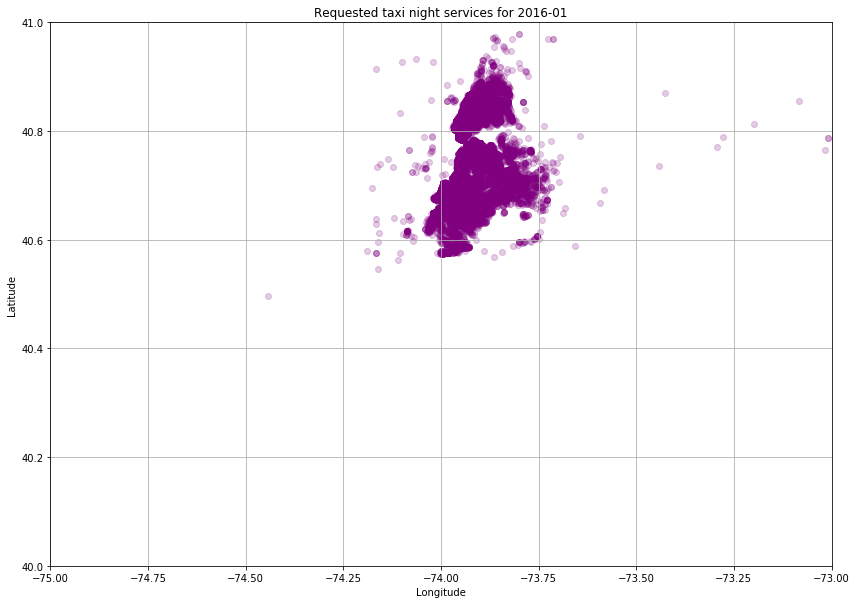

In [29]:
# Plotting early morning group services.
# Gráfico del grupo de servicios de madrugada.

plt.scatter(nightDf['Pickup_longitude'], nightDf['Pickup_latitude'], c='purple', alpha = 0.2)
plt.xlim(-75, -73)
plt.xlabel('Longitude')
plt.ylim(40, 41)
plt.ylabel('Latitude')
plt.title('Requested taxi night services for {}'.format(rCurrentDf['Pickup_Date'][1][0:7]))
plt.rcParams['figure.figsize'] = [14, 10]
plt.grid(True)
plt.show()

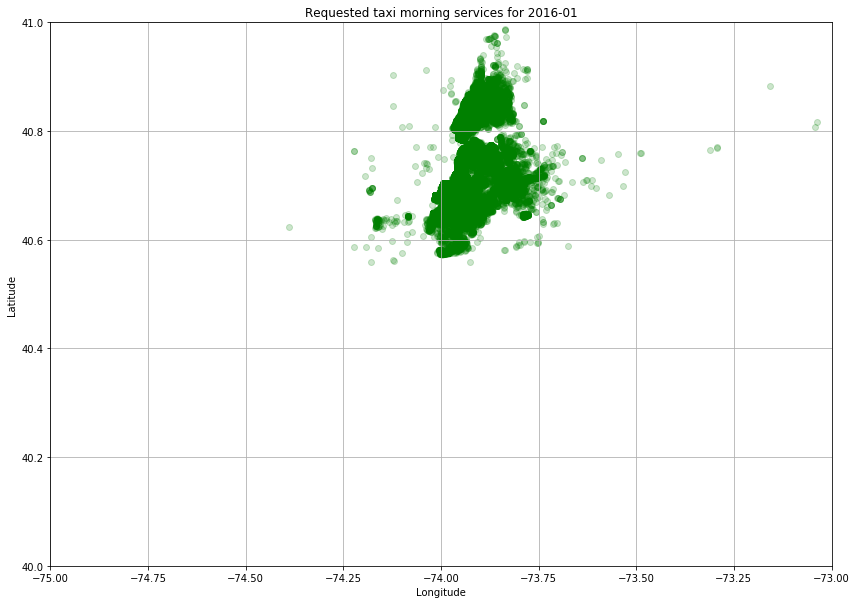

In [30]:
# Plotting morning group services.
# Gráfico del grupo de servicios matutinos.

plt.scatter(morningDf['Pickup_longitude'], morningDf['Pickup_latitude'], c='g', alpha = 0.2)
plt.xlim(-75, -73)
plt.xlabel('Longitude')
plt.ylim(40, 41)
plt.ylabel('Latitude')
plt.title('Requested taxi morning services for {}'.format(rCurrentDf['Pickup_Date'][1][0:7]))
plt.rcParams['figure.figsize'] = [14, 10]
plt.grid(True)
plt.show()

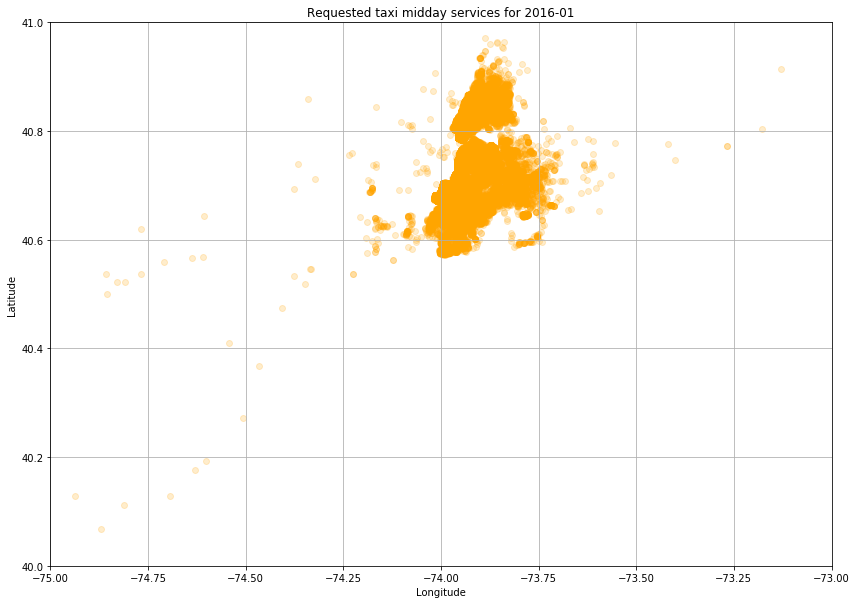

In [31]:
# Plotting midday group services.
# Gráfico del grupo de servicios vespertinos.

plt.scatter(middayDf['Pickup_longitude'], middayDf['Pickup_latitude'], c='orange', alpha = 0.2)
plt.xlim(-75, -73)
plt.xlabel('Longitude')
plt.ylim(40, 41)
plt.ylabel('Latitude')
plt.title('Requested taxi midday services for {}'.format(rCurrentDf['Pickup_Date'][1][0:7]))
plt.rcParams['figure.figsize'] = [14, 10]
plt.grid(True)
plt.show()

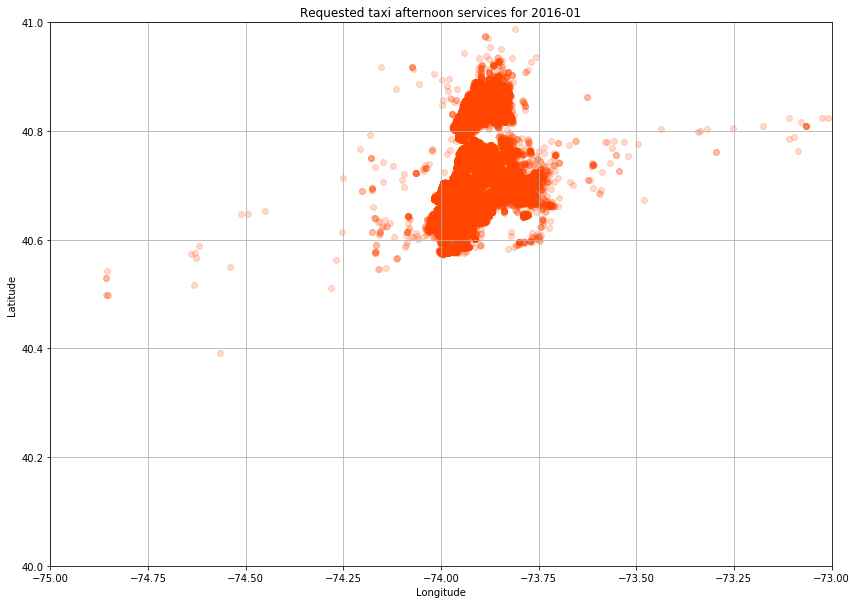

In [32]:
# Plotting afternoon group services.
# Gráfico del grupo de servicios tarde-noche.

plt.scatter(afternoonDf['Pickup_longitude'], afternoonDf['Pickup_latitude'], c='orangered', alpha = 0.2)
plt.xlim(-75, -73)
plt.xlabel('Longitude')
plt.ylim(40, 41)
plt.ylabel('Latitude')
plt.title('Requested taxi afternoon services for {}'.format(rCurrentDf['Pickup_Date'][1][0:7]))
plt.rcParams['figure.figsize'] = [14, 10]
plt.grid(True)
plt.show()

### Analysis and Report comments
Even when this is just one month of 2016, and the whole data set over which I will run this code is composed of more than twenty four month, you can see that there are some services request that only occur during midday and afternoon horaries in the surrounding area of New York city. 

It might be an interesting information to analyze in depth. Is it because the amount of taxis for that area are not enough? Is it because they are living their vehicles at home to go to NY city to have a drink? dinner? Is it because taxi drivers are looking to get out from traffic? from competitors?

It might seems obvious but it is important to note the obvious things as well, sometimes plotts confirms a theory, sometimes not. In this case, it's quite clear that taxicabs services are requested 24h a day, which could be a source of waeknees or strength. Let's suppose that they start a strike, certainly would cause a collapse, something to be aware of. Let's suppose that the government wants to spread out an important communication, they are a great option for that as well.

In a real-world scenario, the approaching of the analysis and report comments would depend on who are asking you to do this analysis and the initial hypothesis to investigate.

### Reporte y comentarios sobre el análisis
Aunque aquí trato los datos de un mes del 2016 solamente, y el conjunto entero de datos a tratar son más de veinticuatro meses, se puede observar que, en los alrededores de la ciudad de New York hay ciertos servicios de taxi que se solicitan solamente durante las horas del medio día y las horas de la tarde-noche.

Esta información podría ser interesante analizarla con mayor profundidad. ¿Puede ser que la cantidad de taxis para dicha área sea insuficiente?, ¿Podría ser que las personas quieren dejar sus coches en casa para ir la ciudad a tomar algo? a cenar? ¿Será porque los conductores de dichos taxis quieren evitar el tráfico? o evitar la competencia?

Puede parecer obvio, pero en ocasiones es importante observar las obviedades también, a veces los gráficos confirman una teoría, a veces no. En este caso, es bastante evidente que los servicios de taxi en la ciudad de New York se solicitan las 24h del día, esto podría convertirse en una debilidad o en una fortaleza según el caso. Supongamos que inician una huelga, sin lugar a dudas crearían un colapso, algo a tener en cuenta. Supongamos que el govierno quiere difundir una información importante, serían una excelente opción a considerar.

En un escenario laboral real, el enfoque del análisis y los comentarios del reporte dependerán en gran medida de quién está solicitando dicho análisis y la hipótesis inicial para su realización.

### Process automation
Since a notebook like this is intended to comment-and-run the process through its phases, I will load to the repository a .py file with the code that follows this structure with some additional commands from the **os** module that I'm using to create folders, to generate run-report files and files in which I will save the plotts, basically things like that.

### Automatización del proceso
Ya que la esencia de una herramienta como esta (Jupyter notebooks) es la de comentar el código conforme se va avanzando en las etapas del mismo y sus ejecuciones, subiré un archivo .py al repositorio con la misma estructura aquí presente, pero incrustada entre comandos del módulo **os** que usaré para crear carpetas, para crear archivos-reporte de las ejecuciones, guardar los gráficos y cosas por el estilo.

### From Data to Database using SQLite3
In this example, the source file was a .csv file and data munging process was done using Pandas, however, in many cases is useful creating or feeding a database with the information gathered once it's clean and neat. And that's what I'll do in the following section.

### *De archivo de Datos a Base de Datos usando SQLite3*
*En este ejemplo, la fuente de los datos han sido archivos .csv y todo el proceso de transformación de la información se ha hecho usando Pandas, sin embargo, en muchos casos resulta útil crear o alimentar una base de datos con la información obtenida una vez que se ha limpiado y ordenado. Eso es lo que haré en la siguiente sección.*

#### Creating the Database
With the following, if the Database file that I'm specifying inside double quotes doesn't exists it will create it. At the same time I'm creating a connection to the Database, and a cursor (c) which will be used to interact with the Database.

#### *Crear una Base de Datos*
*En el código a continuación, si la Base de Datos que estoy especificando entre comillas no existe, se creará automáticamente. Al mismo tiempo, crearé la conexión a la Base de Datos y un cursor (c) que usaré para interactuar con la misma.*

In [58]:
conn = sqlite3.connect("{}_Data.sqlite3".format(rCurrentDf['Pickup_Date'][1][0:7]))
c = conn.cursor()

#### Feeding the Database
Now I will feed the Database with the tables (DataFrames) I have created earlier. To do that I will use the following code:

`DataFrameName.to_sql(name="tableName", con=valueOfConnection)`
    
If I were about to feed an existing table in a Database, one more argument must be added, e.g.

`DataFrameName.to_sql(name="tableName", con=valueOfConnection, if_exists='append')`

#### *Agregar las tablas a la Base de Datos*
*Ahora alimentaré la Base de Datos con las tablas (DataFrames) que he creado anteriormente. Para ello usaré el siguiente código:*

`DataFrameName.to_sql(name="tableName", con=valueOfConnection)`

*Si quisiera alimentar una tabla ya existente de una Base de Datos, tendría que agregar otro argumento, por ejemplo:*

`DataFrameName.to_sql(name="tableName", con=valueOfConnection, if_exists='append')`

In [59]:
nightDf.to_sql(name="Night_Table", con=sqlite3.connect("{}_Data.sqlite3".format(rCurrentDf['Pickup_Date'][1][0:7])))
morningDf.to_sql(name="Morning_Table", con=sqlite3.connect("{}_Data.sqlite3".format(rCurrentDf['Pickup_Date'][1][0:7])))
middayDf.to_sql(name="Midday_Table", con=sqlite3.connect("{}_Data.sqlite3".format(rCurrentDf['Pickup_Date'][1][0:7])))
afternoonDf.to_sql(name="Afternoon_Table", con=sqlite3.connect("{}_Data.sqlite3".format(rCurrentDf['Pickup_Date'][1][0:7])))

(EN) To confirm that all tables were added, we can use the following.

*(ES) Para confirmar que todas las tablas se agregaron, podemos usar el siguiente código.*

In [60]:
c.execute("""
SELECT name FROM sqlite_master
WHERE type='table';
""")
print(c.fetchall())

[('Night_Table',), ('Morning_Table',), ('Midday_Table',), ('Afternoon_Table',)]


(EN) And, for example, if we want to see the name of the columns to double-check the order of them in the Database table, we can do the following.

*(ES) Y, por ejemplo, si queremos ver el nombre de las columnas para confirmar que se hayan agregado en el orden correcto, podemos hacer lo siguiente.*

In [62]:
c.execute("""
SELECT * FROM Night_Table
""")
row = c.fetchone()
for i in c.description:
    print(i[0]+", ", end="")

index, Pickup_Date, Pickup_Time, Pickup_longitude, Pickup_latitude, Horary, 

(EN) Finally we must commit and close our connection as follow.

*(ES) Finalmente debemos ejecutar el comando `.commit()` para "fijar" los cambios realizados y cerrar la conexión.*

In [ ]:
c.close()

conn.commit()
conn.close()

### Ending
Just as an additional comment, the file created as Database by the SQLite3 command has 100MB and the one created by the csv command has 100MB as well.

### *Final*
*Solo como comentario adicional, el archivo creado como Base de Datos por el comando de SQLite3 tiene 100MB y el creado por el comando csv también tiene 100MB.*